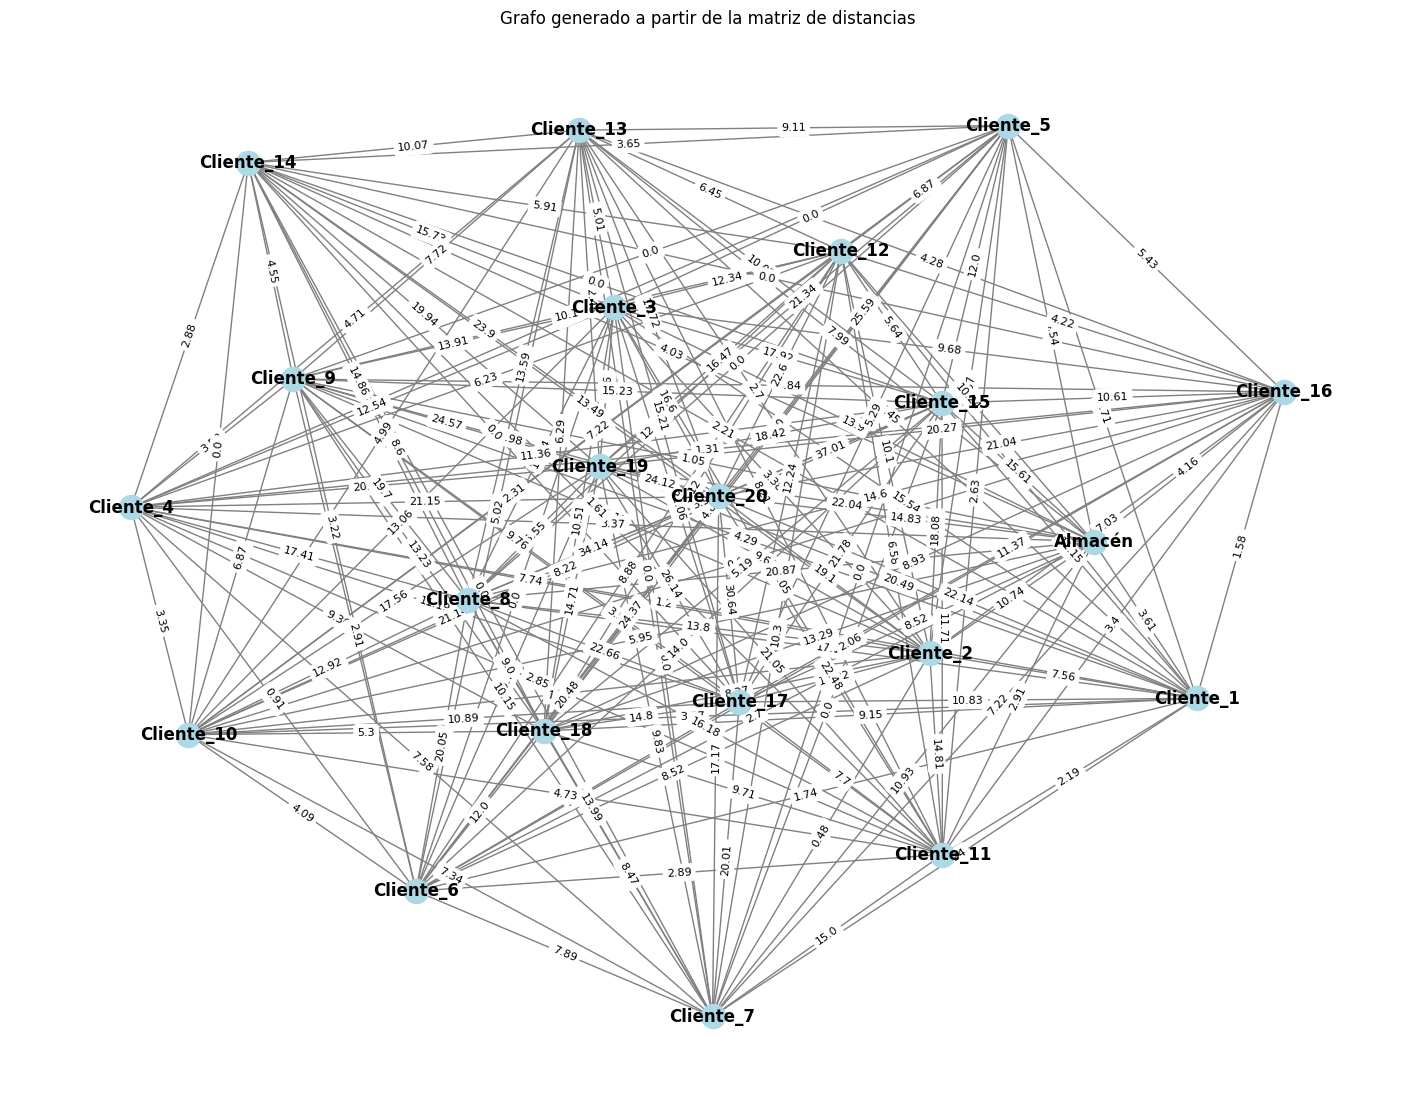

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leer el archivo de matriz de distancias
df = pd.read_excel('df_distance_km.xlsx')  # Reemplaza con la ruta correcta

# Convertir la matriz de distancias a una lista de aristas
edges = []
for i, source in enumerate(df.columns):
    for j, target in enumerate(df.columns):
        if i != j:  # Excluir distancias de un nodo consigo mismo
            weight = round(df.iloc[i, j], 2)
            edges.append((source, target, weight))

# Crear el grafo en NetworkX
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Representación gráfica del grafo
fig, ax = plt.subplots(figsize=(18, 14))
pos = nx.spring_layout(G, seed=42)  # Layout para mantener posiciones consistentes
nx.draw(G, pos, with_labels=True, ax=ax, node_color='lightblue', edge_color='gray', font_weight='bold')

# Mostrar pesos en las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo generado a partir de la matriz de distancias")
plt.show()


In [24]:
inicio = 'Almacén'
objetivo = 'Cliente_11'

# Usar dijkstra_path para encontrar el camino más corto
camino = nx.dijkstra_path(G, inicio, objetivo)

# Mostrar el camino más corto
print(f"Camino más corto desde {inicio} hasta {objetivo}: {camino}")

Camino más corto desde Almacén hasta Cliente_11: ['Almacén', 'Cliente_9', 'Cliente_5', 'Cliente_7', 'Cliente_14', 'Cliente_11']
